In [1]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib as plot  # type: ignore

In [2]:
# import the dataset

match = pd.read_csv("data/matches.csv")
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
# number of super overs played in ipl

match["super_over"].value_counts()

super_over
N    1010
Y      14
Name: count, dtype: int64

In [4]:
# replace "Rising Pune Supergiant" with "Rising Pune Supergiants" as both are same

match.loc[match['team2'] == "Rising Pune Supergiant", 'team2'] = 'Rising Pune Supergiants'
match.loc[match['team1'] == "Rising Pune Supergiant", 'team1'] = 'Rising Pune Supergiants'

In [5]:
# players who have won the most man of the match

match['player_of_match'].value_counts().head(10)

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
V Kohli           16
KA Pollard        14
SK Raina          14
Name: count, dtype: int64

In [6]:
# different types of matches played since the beginning

match['match_type'].value_counts()

match_type
League                962
Final                  16
Qualifier 1            13
Qualifier 2            13
Eliminator             10
Semi Final              6
Elimination Final       3
3rd Place Play-Off      1
Name: count, dtype: int64

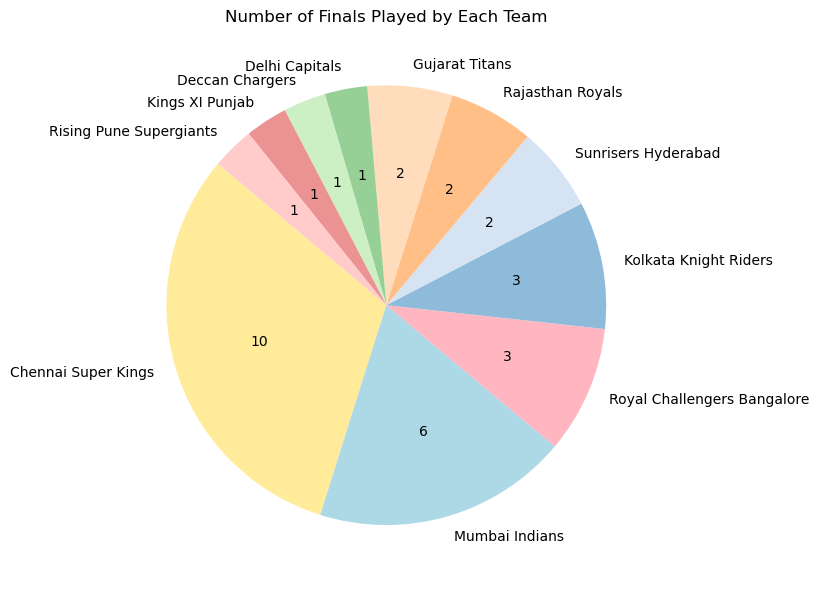

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming `match` DataFrame is already loaded

# Step 1: Filter the matches that are finals
final_matches = match[match["match_type"] == "Final"]

# Step 2: Concatenate the teams that have participated in the finals
teams_in_final = pd.concat([final_matches["team1"], final_matches["team2"]])

# Step 3: Count the occurrences of each team in the finals
final_teams_count = teams_in_final.value_counts()

# Step 4: Filter out teams with 0 finals
final_teams_count = final_teams_count[final_teams_count > 0]

# Step 5: Sort the teams by the number of finals they have played in
final_teams_count_sorted = final_teams_count.sort_values(ascending=False)

# Step 6: Define pastel colors starting with yellow, blue, and red
pastel_colors = [
    "#FFEB99",
    "#ADD8E6",
    "#FFB6C1",
]  # pastel yellow, pastel blue, pastel red


# Generate additional pastel colors
def lighten_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except KeyError:
        c = color
    c = mcolors.to_rgb(c)
    return [(1 - amount) * x + amount for x in c]


# Generate additional pastel colors from a colormap
colormap = plt.cm.tab20.colors
additional_pastel_colors = [
    lighten_color(colormap[i % len(colormap)], 0.5)
    for i in range(len(final_teams_count_sorted) - len(pastel_colors))
]
additional_pastel_colors = [mcolors.to_hex(c) for c in additional_pastel_colors]
colors = pastel_colors + additional_pastel_colors

# Step 7: Plot the results using a pie chart with counts
plt.figure(figsize=(10, 6))
plt.pie(
    final_teams_count_sorted,
    labels=final_teams_count_sorted.index,
    autopct=lambda p: f"{int(p * sum(final_teams_count_sorted) / 100)}",
    startangle=140,
    colors=colors[: len(final_teams_count_sorted)],
)
plt.title("Number of Finals Played by Each Team")
plt.tight_layout()
plt.show()

In [8]:
match['venue'].value_counts().head()

venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64

In [9]:
match[match['venue'] == "Wankhede Stadium"].head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
35,336018,2007/08,Mumbai,2008-05-14,League,ST Jayasuriya,Wankhede Stadium,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,wickets,9.0,157.0,20.0,N,NaN,BR Doctrove,AM Saheba
37,336021,2007/08,Mumbai,2008-05-16,League,SM Pollock,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,Mumbai Indians,wickets,8.0,68.0,20.0,N,NaN,BR Doctrove,DJ Harper
44,336028,2007/08,Mumbai,2008-05-21,League,SE Marsh,Wankhede Stadium,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Kings XI Punjab,runs,1.0,190.0,20.0,N,NaN,BF Bowden,GA Pratapkumar
55,336038,2007/08,Mumbai,2008-05-30,Semi Final,SR Watson,Wankhede Stadium,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,field,Rajasthan Royals,runs,105.0,193.0,20.0,N,NaN,BF Bowden,RE Koertzen


In [10]:
match['toss_decision'].value_counts()

toss_decision
field    652
bat      372
Name: count, dtype: int64

In [11]:
match[match['venue'] == "Wankhede Stadium, Mumbai"].head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
817,1254059,2021,Mumbai,2021-04-10,League,S Dhawan,"Wankhede Stadium, Mumbai",Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,7.0,189.0,20.0,N,NaN,AK Chaudhary,VK Sharma
819,1254061,2021,Mumbai,2021-04-12,League,SV Samson,"Wankhede Stadium, Mumbai",Punjab Kings,Rajasthan Royals,Rajasthan Royals,field,Punjab Kings,runs,4.0,222.0,20.0,N,NaN,AK Chaudhary,S Ravi
822,1254064,2021,Mumbai,2021-04-15,League,JD Unadkat,"Wankhede Stadium, Mumbai",Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,148.0,20.0,N,NaN,S Ravi,VK Sharma
823,1254065,2021,Mumbai,2021-04-16,League,DL Chahar,"Wankhede Stadium, Mumbai",Punjab Kings,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,6.0,107.0,20.0,N,NaN,AK Chaudhary,AY Dandekar
826,1254068,2021,Mumbai,2021-04-18,League,S Dhawan,"Wankhede Stadium, Mumbai",Punjab Kings,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,wickets,6.0,196.0,20.0,N,NaN,AK Chaudhary,PR Reiffel


In [12]:
match['season'].value_counts()

# replace years in wrong format

match.loc[match.season == '2009/10','season'] = 2010
match.loc[match.season == '2007/08','season'] = 2008
match.loc[match.season == '2020/21','season'] = 2020

In [13]:
# find umpires under whom mumbai indians have won

print(match[match['winner'] == 'Mumbai Indians']['umpire1'].value_counts().head(10))
match[match['winner'] == 'Mumbai Indians']['umpire2'].value_counts().head(10)

umpire1
HDPK Dharmasena          17
Nitin Menon              11
BR Doctrove              10
CB Gaffaney              10
Asad Rauf                 9
AK Chaudhary              8
S Ravi                    7
BNJ Oxenford              6
M Erasmus                 6
KN Ananthapadmanabhan     5
Name: count, dtype: int64


umpire2
S Ravi           15
SJA Taufel       12
RJ Tucker        10
CK Nandan        10
Nitin Menon       9
VA Kulkarni       8
CB Gaffaney       7
VK Sharma         6
RB Tiffin         4
C Shamshuddin     4
Name: count, dtype: int64

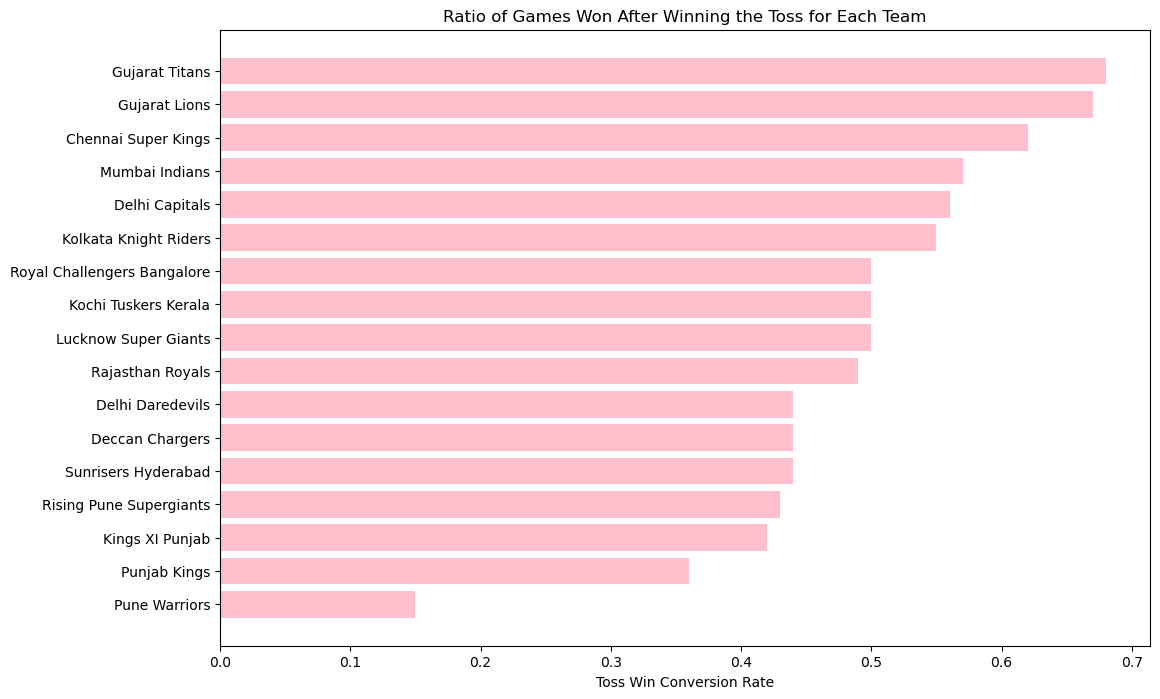

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

all_teams = match["team1"].unique().tolist()

total_matches_per_team = {}
toss_win_ratios = {}

for team in all_teams:
    matches_played = match[(match["team1"] == team) | (match["team2"] == team)].shape[0]
    total_matches_per_team[team] = matches_played

for team in all_teams:
    count_win = match[(match["toss_winner"] == team) & (match["winner"] == team)].shape[
        0
    ]
    count_loss = match[
        (match["toss_winner"] == team) & (match["winner"] != team)
    ].shape[0]
    if (count_win + count_loss) > 0:
        toss_win_ratio = round(count_win / (count_win + count_loss), 2)
    else:
        toss_win_ratio = 0
    toss_win_ratios[team] = toss_win_ratio

sorted_teams = sorted(toss_win_ratios.items(), key=lambda x: x[1], reverse=True)
teams = [item[0] for item in sorted_teams]
ratios = [item[1] for item in sorted_teams]

pastel_color = (1.0, 0.75, 0.8)

plt.figure(figsize=(12, 8))
bars = plt.barh(teams, ratios, color=pastel_color)
plt.xlabel("Toss Win Conversion Rate")
plt.title("Ratio of Games Won After Winning the Toss for Each Team")
plt.gca().invert_yaxis()
plt.show()

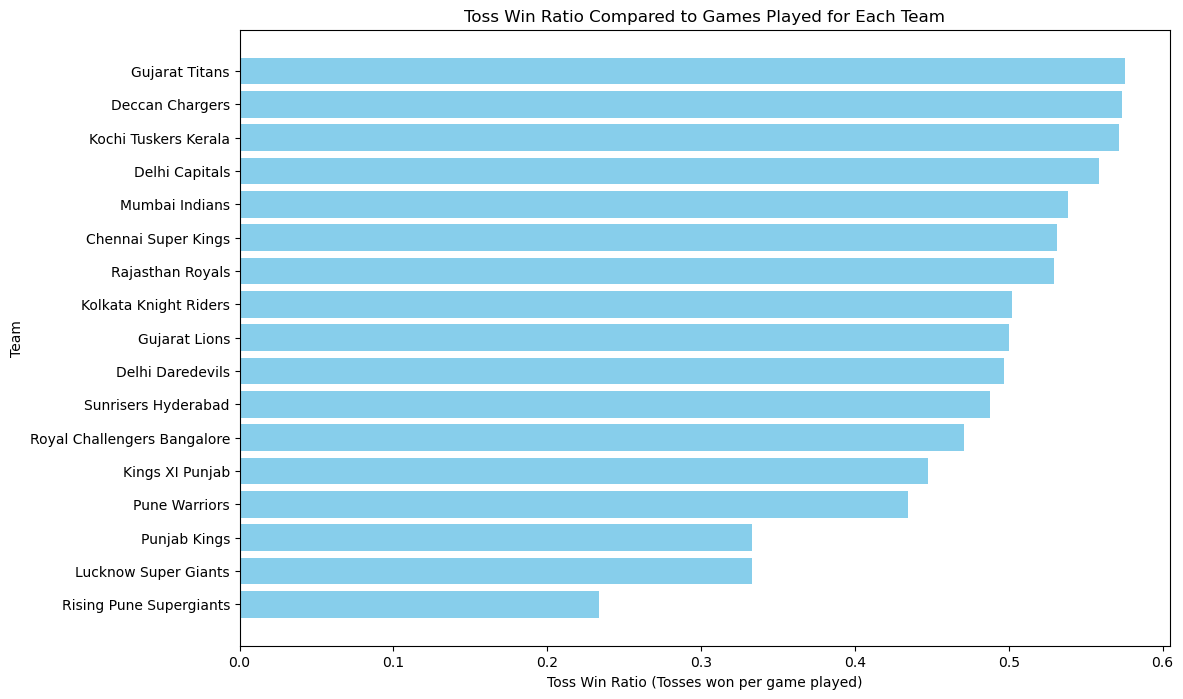

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `match` DataFrame is already loaded

# Step 1: Get the list of all teams
all_teams = match["team1"].unique().tolist()

# Step 2: Initialize a dictionary to store the total toss wins per team
total_toss_wins_per_team = {}

# Step 3: Calculate the total number of tosses won by each team
for team in all_teams:
    tosses_won = match[match["toss_winner"] == team].shape[0]
    total_toss_wins_per_team[team] = tosses_won

# Step 4: Sort the teams by their toss win ratio compared to games played
sorted_teams = sorted(
    total_toss_wins_per_team.items(),
    key=lambda x: x[1] / total_matches_per_team[x[0]],
    reverse=True,
)

# Step 5: Plot the results using a bar chart
teams = [item[0] for item in sorted_teams]
toss_win_ratios = [item[1] / total_matches_per_team[item[0]] for item in sorted_teams]

plt.figure(figsize=(12, 8))
plt.barh(teams, toss_win_ratios, color="skyblue")
plt.xlabel("Toss Win Ratio (Tosses won per game played)")
plt.ylabel("Team")
plt.title("Toss Win Ratio Compared to Games Played for Each Team")
plt.gca().invert_yaxis()  # Invert y-axis to show highest ratio at the top
plt.show()

In [16]:
total_matches_per_team = dict(
    sorted(total_matches_per_team.items(), key=lambda item: item[1], reverse=True)
)
max_team_name_length = max(len(team) for team in total_matches_per_team.keys())

for team, matches_played in total_matches_per_team.items():
    print(f"{team.ljust(max_team_name_length)} : {matches_played}")

Mumbai Indians              : 247
Royal Challengers Bangalore : 240
Kolkata Knight Riders       : 237
Chennai Super Kings         : 224
Rajasthan Royals            : 206
Kings XI Punjab             : 190
Sunrisers Hyderabad         : 166
Delhi Daredevils            : 161
Delhi Capitals              : 77
Deccan Chargers             : 75
Pune Warriors               : 46
Punjab Kings                : 42
Gujarat Titans              : 33
Gujarat Lions               : 30
Rising Pune Supergiants     : 30
Lucknow Super Giants        : 30
Kochi Tuskers Kerala        : 14


Step 1 - All Teams: ['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals', 'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans']


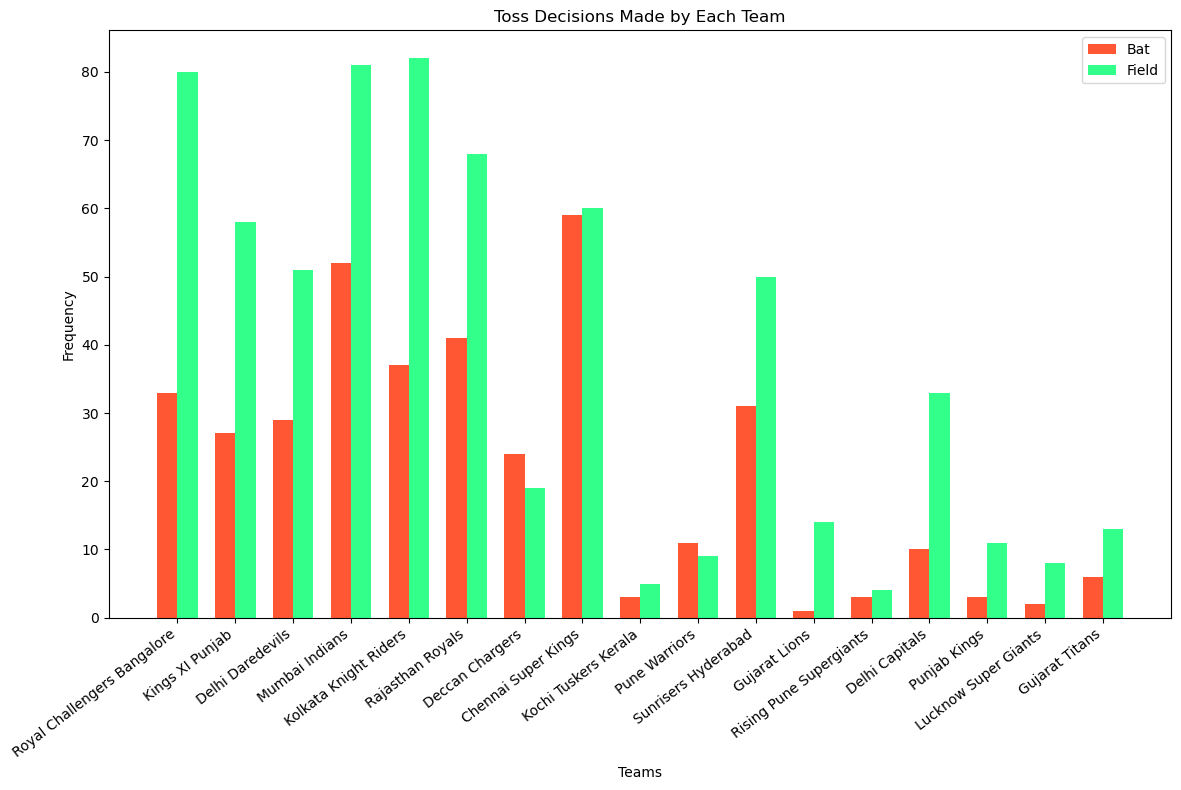

In [17]:
# Assuming `match` DataFrame is already loaded

# Step 1: Get the list of all teams
all_teams = match["team1"].unique().tolist()
print("Step 1 - All Teams:", all_teams)

# Step 2: Initialize a dictionary to store the toss decisions made by each team
team_toss_decisions = {}

# Step 3: Calculate the toss decisions made by each team
for team in all_teams:
    team_toss_match = match[match["toss_winner"] == team]
    toss_decisions_count = team_toss_match["toss_decision"].value_counts()
    team_toss_decisions[team] = (
        toss_decisions_count.to_dict()
    )  # Convert Series to dictionary

# Ensure all teams have both "bat" and "field" categories
for team in all_teams:
    if "bat" not in team_toss_decisions[team]:
        team_toss_decisions[team]["bat"] = 0
    if "field" not in team_toss_decisions[team]:
        team_toss_decisions[team]["field"] = 0

# Step 4: Separate the toss decision counts for each team
team_bat_counts = {
    team: toss_decisions.get("bat", 0)
    for team, toss_decisions in team_toss_decisions.items()
}
team_field_counts = {
    team: toss_decisions.get("field", 0)
    for team, toss_decisions in team_toss_decisions.items()
}

# Step 5: Plot the results using grouped bar chart
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(all_teams))  # Use numpy.arange for evenly spaced positions

plt.bar(index, team_bat_counts.values(), bar_width, label="Bat", color="#FF5733")
plt.bar(
    index + bar_width,
    team_field_counts.values(),
    bar_width,
    label="Field",
    color="#33FF8B",
)

plt.xlabel("Teams")
plt.ylabel("Frequency")
plt.title("Toss Decisions Made by Each Team")
plt.xticks(
    index + bar_width / 2, all_teams, rotation=37.5, ha="right"
)  # Adjust x-axis positions and rotation
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [18]:
# determine relationship betweeen winning the toss and winning/losing

w = match[match["toss_winner"] == match["winner"]].shape[0]
print(f"number of matches where toss winner wins the match {w}\n")

l = match[match["toss_winner"] != match["winner"]].shape[0]
print(f"number of matches where toss winner loses the match {l}")

number of matches where toss winner wins the match 523

number of matches where toss winner loses the match 501


In [28]:
team_to_victory_ratio = {}

for team in all_teams:
    toss_won = sum(match["toss_winner"] == team)
    match_and_toss_won = sum((match["winner"] == team) & (match["toss_winner"] == team))

    if toss_won != 0:  # to avoid division by zero
        ratio = round(match_and_toss_won / toss_won, 3)
    else:
        ratio = 0

    team_to_victory_ratio[team] = ratio

team_to_victory_ratio_sorted = dict(
    sorted(team_to_victory_ratio.items(), key=lambda item: item[1], reverse=True)
)

for team, ratio in team_to_victory_ratio_sorted.items():
    print(f"{team.ljust(max_team_name_length)} : {ratio:.3f}")

Gujarat Titans              : 0.684
Gujarat Lions               : 0.667
Chennai Super Kings         : 0.622
Mumbai Indians              : 0.571
Delhi Capitals              : 0.558
Kolkata Knight Riders       : 0.546
Royal Challengers Bangalore : 0.504
Kochi Tuskers Kerala        : 0.500
Lucknow Super Giants        : 0.500
Rajasthan Royals            : 0.486
Sunrisers Hyderabad         : 0.444
Deccan Chargers             : 0.442
Delhi Daredevils            : 0.438
Rising Pune Supergiants     : 0.429
Kings XI Punjab             : 0.424
Punjab Kings                : 0.357
Pune Warriors               : 0.150


In [20]:
# highest victory margins

sorted_match = match.sort_values(by="result_margin", ascending=False)

sorted_match[["result_margin", "team1", "team2", "winner", "date"]].head()

,result_margin,team1,team2,winner,date
620,146.0,Delhi Daredevils,Mumbai Indians,Mumbai Indians,2017-05-06
560,144.0,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,2016-05-14
0,140.0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008-04-18
496,138.0,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,2015-05-06
352,130.0,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,2013-04-23


In [24]:
match[match["id"] == 1359479]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
954,1359479,2023,Bengaluru,2023-04-02,League,F du Plessis,"M Chinnaswamy Stadium, Bengaluru",Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,172.0,20.0,N,NaN,Nitin Menon,Tapan Sharma
